In [7]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.ticker as tic

import lmfit
import vector
import string

from spyral_utils.plot import Histogrammer
from spyral_utils.nuclear import NuclearDataMap

%matplotlib widget
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.labelsize'] = 15

In [8]:
grammer = Histogrammer()

In [9]:
# # Plot drift velocity vs run

# df = pl.read_csv("C:\\Users\\zachs\\Desktop\\e20009_analysis\\e20009_analysis\\e20009_parameters\\drift_velocity.csv")

# # Add drift velocity column (units of cm / sec)
# df = df.with_columns((100/((pl.col("average_window_tb")-pl.col("average_micromegas_tb"))*0.32)).alias("dv"))

# # Add error on drift veclocity column
# df = df.with_columns(((100/(0.32))*pl.Expr.sqrt(pl.col("average_window_tb_error")**2 + pl.col("average_micromegas_tb_error")**2)
#                      /(pl.col("average_window_tb")-pl.col("average_micromegas_tb"))**2).alias("dv_err"))
# dfd = df.to_dict(as_series=False)

# fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, width_ratios=[1,7])
# ax1.errorbar(dfd["run"], dfd["dv"], yerr=dfd["dv_err"], fmt='o', label="Data")
# ax2.errorbar(dfd["run"], dfd["dv"], yerr=dfd["dv_err"], fmt='o', label="Data")

# fig.subplots_adjust(wspace=0.1)

# ax1.set_xlim(105, 129)
# ax2.set_xlim(170, 375)

# ax1.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)

# ax1.yaxis.tick_left()
# ax1.tick_params(right=False)
# ax2.tick_params(left=False)
# ax2.tick_params(right=False)

# # Make break lines on graphs
# d=0.01
# kwargs=dict(transform=ax1.transAxes, color='k', clip_on=False)
# ax1.plot((1-7*d, 1+7*d), (-d,+d), **kwargs)
# ax1.plot((1-7*d, 1+7*d), (1-d,1+d), **kwargs)

# kwargs.update(transform=ax2.transAxes)
# ax2.plot((-d,+d), (1-d,1+d), **kwargs)
# ax2.plot((-d, +d), (-d,+d), **kwargs)

# fig.supxlabel("Run number")
# fig.supylabel(r"Drift velocity (cm / $\mu$sec)")
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# fig.savefig("C:\\Users\\zachs\\Desktop\\dv.pdf")
# fig.set_layout_engine("tight") 

In [10]:
# # Plot of 2.65 MeV XS comparing LBFGSB and LM

# lbf = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\dp_2.65_fitter_comp\\2.65_xs_lbfgsb.csv", delimiter=',')
# lm = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\dp_2.65_fitter_comp\\2.65_xs_ls.csv", delimiter=',')

# fig, ax = plt.subplots(1,1)
# x_maj_ticks = np.linspace(19, 33, 8)
# ax.set_xticks(x_maj_ticks)
# ax.errorbar(lbf[:,0], lbf[:,1], yerr=lbf[:,2], fmt='o', capsize=5, label="L-BFGS-B", elinewidth=2, markersize=9)
# ax.errorbar(lm[:,0], lm[:,1], yerr=lm[:,2], fmt='^', capsize=5, label="Levenberg-Marquardt", elinewidth=2, markersize=9)
# ax.grid()
# ax.set_xlabel(r"$\theta_{CM}$ (deg)")
# ax.set_ylabel(r"$d\sigma / d\Omega$ (mb / sr)")
# ax.legend()
# plt.ylim(0,6)
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# fig.tight_layout()
# fig.set_layout_engine("tight") 

# fig.savefig("C:\\Users\\zachs\\Desktop\\2.65_xs_lbfgsb_vs_lm.pdf")

In [11]:
# # Plot 32-34 CM bin excitation energy spectrum for LBFGSB and LM

# lbf = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\lbf_32-34_bin.csv", delimiter=',')
# grammer.add_hist1d("32-34_lbf",85, (-0.5, 4.0))
# grammer.fill_hist1d("32-34_lbf", lbf)
# lbf_hist = grammer.get_hist1d("32-34_lbf")

# lm = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\ls_32-34_bin.csv", delimiter=',')
# grammer.add_hist1d("32-34_lm",85, (-0.5, 4.0))
# grammer.fill_hist1d("32-34_lm", lm)
# lm_hist = grammer.get_hist1d("32-34_lm")

# fig, ax = plt.subplots(1,1)
# ax.stairs(lbf_hist.counts, edges=lbf_hist.bins, linewidth=2, label="L-BFGS-B")
# ax.stairs(lm_hist.counts, edges=lm_hist.bins, linestyle="--", linewidth=2, label="Levenberg-Marquardt")
# ax.set_xlabel("Excitation energy (MeV)")
# ax.set_ylabel("Counts / 53 keV")
# ax.legend()
# # plt.xlim(-0.5, 4.0)
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# fig.tight_layout()
# fig.set_layout_engine("tight")

# fig.savefig("C:\\Users\\zachs\\Desktop\\32-34_bin_lbfgsb_vs_lm.pdf")

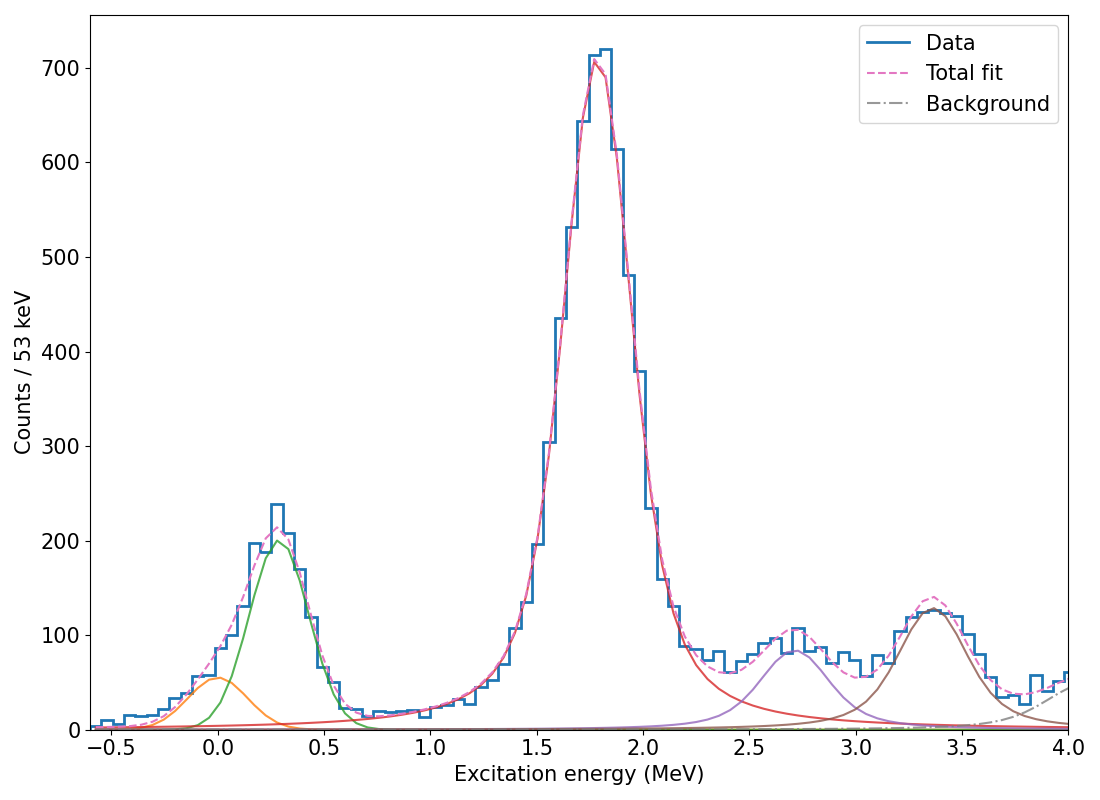

In [ ]:
# # Plot of fit to good range of excitation spectrum dp

# data = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\excitation_spectra\\transfer_ex_spect.csv", delimiter=',')
# grammer.add_hist1d("ex_spect",92, (-0.6, 4.3))
# grammer.fill_hist1d("ex_spect", data)
# ex = grammer.get_hist1d("ex_spect")

# # Fit histogram
# peak1 = lmfit.models.GaussianModel(prefix="peak1_")
# peak1_bins, peak1_counts = ex.get_subrange((-0.1, 0.1))
# peak1_bins += 0.5 * ex.bin_width
# peak1_weights = np.sqrt(peak1_counts)
# peak1_weights = np.divide(1, peak1_weights, out=np.zeros_like(peak1_weights), where=peak1_weights!=0.0)
# pars = peak1.guess(x=peak1_bins, data=peak1_counts, weights=peak1_weights)
# pars["peak1_amplitude"].min = 0.0
# pars["peak1_center"].min = 0.0
# pars["peak1_center"].max = 0.1

# peak2 = lmfit.models.GaussianModel(prefix="peak2_")
# peak2_bins, peak2_counts = ex.get_subrange((0.2, 0.5))
# peak2_bins += 0.5 * ex.bin_width
# peak2_weights = np.sqrt(peak2_counts)
# peak2_weights = np.divide(1, peak2_weights, out=np.zeros_like(peak2_weights), where=peak2_weights!=0.0)
# pars.update(peak2.guess(x=peak2_bins, data=peak2_counts, weights=peak2_weights))
# pars["peak2_amplitude"].min = 0.0
# pars["peak2_center"].min = 0.2
# pars["peak2_center"].max = 0.5
# pars["peak2_sigma"].set(expr="peak1_sigma", vary=True)

# peak3 = lmfit.models.VoigtModel(prefix="peak3_")
# peak3_bins, peak3_counts = ex.get_subrange((1.2, 2.2))
# peak3_bins += 0.5 * ex.bin_width
# peak3_weights = np.sqrt(peak3_counts)
# peak3_weights = np.divide(1, peak3_weights, out=np.zeros_like(peak3_weights), where=peak3_weights!=0.0)
# pars.update(peak3.guess(x=peak3_bins, data=peak3_counts, weights=peak3_weights))
# pars["peak3_amplitude"].min = 0.0
# pars["peak3_center"].min = 1.2
# pars["peak3_center"].max = 2.2

# peak4 = lmfit.models.VoigtModel(prefix="peak4_")
# peak4_bins, peak4_counts = ex.get_subrange((2.5, 2.8))
# peak4_bins += 0.5 * ex.bin_width
# peak4_weights = np.sqrt(peak4_counts)
# peak4_weights = np.divide(1, peak4_weights, out=np.zeros_like(peak4_weights), where=peak4_weights!=0.0)
# pars.update(peak4.guess(x=peak4_bins, data=peak4_counts, weights=peak4_weights))
# pars["peak4_amplitude"].min = 0.0
# pars["peak4_center"].min = 2.5
# pars["peak4_center"].max = 2.8
# pars["peak4_sigma"].set(expr="peak3_sigma", vary=False)

# peak5 = lmfit.models.VoigtModel(prefix="peak5_")
# peak5_bins, peak5_counts = ex.get_subrange((3.2, 3.6))
# peak5_bins += 0.5 * ex.bin_width
# peak5_weights = np.sqrt(peak5_counts)
# peak5_weights = np.divide(1, peak5_weights, out=np.zeros_like(peak5_weights), where=peak5_weights!=0.0)
# pars.update(peak5.guess(x=peak5_bins, data=peak5_counts, weights=peak5_weights))
# pars["peak5_amplitude"].min = 0.0
# pars["peak5_center"].min = 3.1
# pars["peak5_center"].max = 3.6
# pars["peak5_sigma"].set(expr="peak3_sigma", vary=False)

# bkgd = lmfit.models.VoigtModel(prefix="bkgd_")
# bkgd_bins, bkgd_counts = ex.get_subrange((3.8, 4.3))
# bkgd_bins += 0.5 * ex.bin_width
# bkgd_weights = np.sqrt(bkgd_counts)
# bkgd_weights = np.divide(1, bkgd_weights, out=np.zeros_like(bkgd_weights), where=bkgd_weights!=0.0)
# pars.update(bkgd.guess(x=bkgd_bins, data=bkgd_counts, weights=bkgd_weights))
# pars["bkgd_amplitude"].min = 0.0
# pars["bkgd_center"].min = 3.8
# pars["bkgd_center"].max = 4.3

# total_fit = peak1 + peak2 + peak3 + peak4 + peak5 + bkgd
# total_bins = ex.bins[:-1] + ex.bin_width/2
# total_counts = ex.counts
# total_weights = np.sqrt(total_counts)
# total_weights = np.divide(1, total_weights, out=np.zeros_like(total_weights), where=total_weights!=0.0)
# total_result = total_fit.fit(params=pars, x=total_bins, data=total_counts, weights=total_weights)

# comps = total_result.eval_components()

# fig, ax = plt.subplots(1,1)
# ax.stairs(ex.counts, edges=ex.bins, linewidth=2, label="Data")
# ax.plot(total_bins, comps["peak1_"], alpha=0.8)
# ax.plot(total_bins, comps["peak2_"], alpha=0.8)
# ax.plot(total_bins, comps["peak3_"], alpha=0.8)
# ax.plot(total_bins, comps["peak4_"], alpha=0.8)
# ax.plot(total_bins, comps["peak5_"], alpha=0.8)
# ax.plot(total_bins, total_result.best_fit, linestyle="--", alpha=1, label="Total fit")
# ax.plot(total_bins, comps["bkgd_"], alpha=0.8, linestyle="-.", label="Background")

# ax.set_xticks(np.linspace(-1, 4, 11))

# ax.set_xlabel("Excitation energy (MeV)")
# ax.set_ylabel("Counts / 53 keV")
# ax.legend()
# plt.xlim(-0.6, 4.0)
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# fig.tight_layout()
# fig.set_layout_engine("tight")

# fig.savefig("C:\\Users\\zachs\\Desktop\\dp_ex_fit.pdf")

In [13]:
# # Plot of fit to good range of excitation spectrum elastic 

# data = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\excitation_spectra\\elastic_ex_spect.csv", delimiter=',')
# grammer.add_hist1d("ex_spect",137, (-2.0, 5.25))
# grammer.fill_hist1d("ex_spect", data)
# ex = grammer.get_hist1d("ex_spect")

# # Fit histogram
# peak1 = lmfit.models.GaussianModel(prefix="peak1_")
# peak1_bins, peak1_counts = ex.get_subrange((-1, 1))
# peak1_bins += 0.5 * ex.bin_width
# peak1_weights = np.sqrt(peak1_counts)
# peak1_weights = np.divide(1, peak1_weights, out=np.zeros_like(peak1_weights), where=peak1_weights!=0.0)
# pars = peak1.guess(x=peak1_bins, data=peak1_counts, weights=peak1_weights)
# pars["peak1_amplitude"].min = 0.0
# pars["peak1_center"].min = -0.5
# pars["peak1_center"].max = 0.5

# peak2 = lmfit.models.GaussianModel(prefix="peak2_")
# peak2_bins, peak2_counts = ex.get_subrange((2.8, 4.8))
# peak2_bins += 0.5 * ex.bin_width
# peak2_weights = np.sqrt(peak2_counts)
# peak2_weights = np.divide(1, peak2_weights, out=np.zeros_like(peak2_weights), where=peak2_weights!=0.0)
# pars.update(peak2.guess(x=peak2_bins, data=peak2_counts, weights=peak2_weights))
# pars["peak2_amplitude"].min = 0.0
# pars["peak2_center"].min = 2.8
# pars["peak2_center"].max = 4.8

# pars["peak1_sigma"].set(expr="peak2_sigma", vary=False)

# total_fit = peak1 + peak2
# total_bins = ex.bins[:-1] + ex.bin_width/2
# total_counts = ex.counts
# total_weights = np.sqrt(total_counts)
# total_weights = np.divide(1, total_weights, out=np.zeros_like(total_weights), where=total_weights!=0.0)
# total_result = total_fit.fit(params=pars, x=total_bins, data=total_counts, weights=total_weights)

# comps = total_result.eval_components()

# fig, ax = plt.subplots(1,1)
# ax.stairs(ex.counts, edges=ex.bins, linewidth=2, label="Data")
# ax.plot(total_bins, comps["peak1_"], alpha=0.8)
# ax.plot(total_bins, comps["peak2_"], alpha=0.8)
# ax.plot(total_bins, total_result.best_fit, linestyle="--", alpha=1, label="Total fit")


# ax.set_xlabel("Excitation energy (MeV)")
# ax.set_ylabel("Counts / 53 keV")
# ax.legend()
# plt.xlim(-2.0, 5.25)
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# fig.tight_layout()
# fig.set_layout_engine("tight")

# fig.savefig("C:\\Users\\zachs\\Desktop\\elastic_ex_fit.pdf")

In [14]:
# # Plot 10Be(d,p) efficiency factors

# gs = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\gs_ef.csv", delimiter=',')
# first = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\0.32_ef.csv", delimiter=',')
# second = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\1.78_ef.csv", delimiter=',')
# third = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\2.65_ef.csv", delimiter=',')
# fourth = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\3.40_ef.csv", delimiter=',')

# bin_cent = np.linspace(11, 39, 15)
# bin_edges = np.linspace(10, 40, 16)

# y_ticks = np.linspace(0, 1, 5)
# y_lim = (0, 1.2)
# sub_title_size = 15

# fig, ax = plt.subplots(5,1, sharex=True)

# ax[0].errorbar(bin_cent, gs[:, 0], yerr=gs[:, 1], fmt='None', linewidth=1.1)
# ax[0].stairs(gs[:, 0], bin_edges, linewidth=1.1)
# ax[0].set_ylim(y_lim)
# ax[0].set_yticks(y_ticks)
# ax[0].set_title("G.S.", fontsize=sub_title_size)
# ax[0].set_axisbelow(True)
# ax[0].grid()
# ax[0].set_xlim(10, 40)

# ax[1].errorbar(bin_cent,first[:, 0], yerr=first[:, 1], fmt='None', linewidth=1.1)
# ax[1].stairs(first[:, 0], bin_edges, linewidth=1.1)
# ax[1].set_ylim(y_lim)
# ax[1].set_yticks(y_ticks)
# ax[1].set_title("0.32 MeV", fontsize=sub_title_size)
# ax[1].set_axisbelow(True)
# ax[1].grid()
# ax[1].set_xlim(10, 40)

# ax[2].errorbar(bin_cent, second[:, 0], yerr=second[:, 1], fmt='None', linewidth=1.1)
# ax[2].stairs(second[:, 0], bin_edges, linewidth=1.1)
# ax[2].set_ylim(y_lim)
# ax[2].set_yticks(y_ticks)
# ax[2].set_title("1.78 MeV", fontsize=sub_title_size)
# ax[2].set_axisbelow(True)
# ax[2].grid()
# ax[2].set_xlim(10, 40)

# ax[3].errorbar(bin_cent, third[:, 0], yerr=third[:, 1], fmt='None', linewidth=1.1)
# ax[3].stairs(third[:, 0], bin_edges, linewidth=1.1)
# ax[3].set_ylim(y_lim)
# ax[3].set_yticks(y_ticks)
# ax[3].set_title("2.65 MeV", fontsize=sub_title_size)
# ax[3].set_axisbelow(True)
# ax[3].grid()
# ax[3].set_xlim(10, 40)

# ax[4].errorbar(bin_cent, fourth[:, 0], yerr=fourth[:, 1], fmt='None', linewidth=1.1)
# ax[4].stairs(fourth[:, 0], bin_edges, linewidth=1.1)
# ax[4].set_ylim(y_lim)
# ax[4].set_yticks(y_ticks)
# ax[4].set_title("3.40 MeV", fontsize=sub_title_size)
# ax[4].set_axisbelow(True)
# ax[4].grid()
# ax[4].set_xlim(10, 40)

# ax[4].set_xticks(bin_edges)
# ax[4].set_xlabel(r"$\theta_{CM}$ (deg)")

# fig.supylabel("Efficiency (percent)")
# fig.set_figheight(11)
# fig.set_figwidth(8.0)
# fig.subplots_adjust(hspace=0.3)
# fig.tight_layout()

# fig.savefig("C:\\Users\\zachs\\Desktop\\dp_ef.pdf")

In [15]:
# # Plot 10Be(d,d') efficiency factors

# elastic = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\elastic_ef.csv", delimiter=',')
# inelastic = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\efficiency\\inelastic_3.37_ef.csv", delimiter=',')

# bin_cent = np.linspace(15, 69, 28)
# bin_edges = np.linspace(14, 70, 29)

# x_maj_ticks = np.linspace(14, 70, 15)
# x_min_ticks = np.linspace(14, 70, 29)
# y_ticks = np.linspace(0, 1, 5)
# y_lim = (0, 1.1)
# sub_title_size = 15

# fig, ax = plt.subplots(2,1, sharex=True)

# ax[0].errorbar(bin_cent, elastic[:, 0], yerr=elastic[:, 1], fmt='None', linewidth=1.1)
# ax[0].stairs(elastic[:, 0], bin_edges, linewidth=1.1)
# ax[0].set_ylim(y_lim)
# ax[0].set_yticks(y_ticks)
# ax[0].set_xticks(x_min_ticks, minor=True)
# ax[0].set_title("Elastic", fontsize=sub_title_size)
# ax[0].grid(which="both")
# ax[0].set_xlim(14, 70)

# ax[1].errorbar(bin_cent,inelastic[:, 0], yerr=inelastic[:, 1], fmt='None', linewidth=1.1)
# ax[1].stairs(inelastic[:, 0], bin_edges, linewidth=1.1)
# ax[1].set_ylim(y_lim)
# ax[1].set_xlim(14, 70)
# ax[1].set_yticks(y_ticks)
# ax[1].set_xticks(x_min_ticks, minor=True)
# ax[1].set_title("3.37 MeV", fontsize=sub_title_size)
# ax[1].grid(which="both")

# ax[1].set_xticks(x_maj_ticks)
# ax[1].set_xlabel(r"$\theta_{CM}$ (deg)")

# fig.supylabel("Efficiency (fraction)")
# fig.set_figheight(6.0)
# fig.set_figwidth(8.0)
# fig.subplots_adjust(hspace=0.3)
# fig.tight_layout()

# fig.savefig("C:\\Users\\zachs\\Desktop\\elastic_ef.pdf")

In [16]:
# # Make plot of reconstructed vs simulated angle for 10Be+d

# rec = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\recon_vs_sim\\elastic_recon.csv", delimiter=',')
# sim = pl.read_csv("C:\\Users\\zachs\\Desktop\\data4plots\\recon_vs_sim\\elastic_sim.csv")

# # Find events with multiple analyzed tracks
# mult_sort, mult_count = np.unique(rec[:, 0].astype(int), return_counts=True)

# df = sim.clear()
# for mult in range(1, np.max(mult_count)+1):
#     sub_frame = sim.filter(pl.col("event").is_in(mult_sort[mult_count==mult]))
#     sub_frame = pl.concat([sub_frame]*mult)
#     df = pl.concat([df, sub_frame])
# df = df.sort("event", descending=False)

# grammer.add_hist2d("rvs", (360, 360), ((0.0, 180.0), (0.0, 180)))
# grammer.fill_hist2d("rvs", np.rad2deg(df.select("cm_angle").to_numpy().flatten()), np.rad2deg(rec[:, 1]))
# hist = grammer.get_hist2d("rvs")

# fig, ax = plt.subplots(1,1)
# mesh = ax.pcolormesh(hist.x_bins, hist.y_bins, hist.counts, norm='log')
# fig.colorbar(mesh, ax=ax, label="Counts")
# ax.set_xlabel(r"Simulated $\theta_{CM}$ (deg)")
# ax.set_ylabel(r"Reconstructed $\theta_{CM}$ (deg)")
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# fig.tight_layout()

In [17]:
# # Plot time correction factors for a pad

# factors = np.load("C:\\Users\\zachs\\Desktop\\data4plots\\time_correction\\time_correction_results.npy")
# pad = 4632

# fig, ax = plt.subplots(1,1)
# ax.errorbar(factors[pad, 2, :6], factors[pad, 0, :6], yerr=factors[pad, 1, :6], xerr=factors[pad, 3, :6], fmt='o')
# ax.set_title(f"")
# ax.set_xlabel("Pad amplitude (ADC units)")
# ax.set_ylabel("Time correction (time buckets)")
# fig.set_figheight(8.0)
# fig.set_figwidth(11.0)
# ax.set_xlim(500, 3000)
# fig.tight_layout()

# fig.savefig("C:\\Users\\zachs\\Desktop\\time_correction_pad.pdf")

In [18]:
# # Plot 10Be(d,d') angular distributions

# elastic = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\cross_sections\\elastic_xs.csv", delimiter=',')
# inelastic = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\cross_sections\\inelastic_3.37_xs.csv", delimiter=',')

# fig, ax = plt.subplots(2,1, sharex=True)

# x_maj_ticks = np.linspace(19, 59, 11)
# x_min_ticks = np.linspace(19, 59, 21)

# ax[0].errorbar(elastic[:, 0], elastic[:, 2], yerr=elastic[:, 3], xerr=elastic[:, 1], fmt='o', label="Elastic")
# ax[0].semilogy()
# ax[0].grid(which="both")

# ax[1].errorbar(inelastic[:, 0], inelastic[:, 2], yerr=inelastic[:, 3], xerr=inelastic[:, 1], fmt='o', label="3.37 MeV")
# ax[1].grid(which="both")

# ax[1].set_xticks(x_min_ticks, minor=True)
# ax[1].set_xticks(x_maj_ticks)
# ax[1].set_xlabel(r"$\theta_{CM}$ (deg)")
 
# for idx, axis in enumerate(ax):    
#     axis.text(0.92, 0.85, f"({string.ascii_lowercase[idx]})", transform=axis.transAxes,  size=15)

# fig.supylabel(r"$d\sigma / d\Omega$ (mb / sr)")
# fig.set_figheight(6.0)
# fig.set_figwidth(8.0)
# fig.subplots_adjust(wspace=0, hspace=0)

# fig.savefig("C:\\Users\\zachs\\Desktop\\elastic_xs.pdf")

In [19]:
# # Plot 10Be(d,p) angular distributions

# gs = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\cross_sections\\dp_gs_xs.csv", delimiter=',')
# first = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\cross_sections\\dp_0.32_xs.csv", delimiter=',')
# second = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\cross_sections\\dp_1.78_xs.csv", delimiter=',')
# third = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\cross_sections\\dp_2.65_xs.csv", delimiter=',')
# fourth = np.genfromtxt("C:\\Users\\zachs\\Desktop\\data4plots\\cross_sections\\dp_3.40_xs.csv", delimiter=',')

# title_list = [gs, first, second, third, fourth]

# fig, ax = plt.subplots(5,1, sharex=True)

# x_maj_ticks = np.linspace(11, 39, 8)
# x_min_ticks = np.linspace(13, 35, 12)

# ax[0].errorbar(gs[:, 0], gs[:, 2], yerr=gs[:, 3], xerr=gs[:, 1], fmt='o', label="G.S.")
# ax[0].grid(which="both")

# ax[1].errorbar(first[:, 0], first[:, 2], yerr=first[:, 3], xerr=first[:, 1], fmt='o', label="0.32 MeV")
# ax[1].grid(which="both")

# ax[2].errorbar(second[:, 0], second[:, 2], yerr=second[:, 3], xerr=second[:, 1], fmt='o', label="1.78 MeV")
# ax[2].grid(which="both")

# ax[3].errorbar(third[:, 0], third[:, 2], yerr=third[:, 3], xerr=third[:, 1], fmt='o', label="2.65 MeV")
# ax[3].grid(which="both")

# ax[4].errorbar(fourth[:, 0], fourth[:, 2], yerr=fourth[:, 3], xerr=fourth[:, 1], fmt='o', label="3.40 MeV")
# ax[4].grid(which="both")

# ax[4].set_xticks(x_maj_ticks)
# ax[4].set_xticks(x_min_ticks, minor=True)
# ax[4].set_xlabel(r"$\theta_{CM}$ (deg)")

# for idx, axis in enumerate(ax):
#     # title = title_list[idx]  
#     # axis.errorbar(title[:, 0], title[:, 2], yerr=title[:, 3], xerr=title[:, 1], fmt='o')  
#     axis.text(0.9, 0.8, f"({string.ascii_lowercase[idx]})", transform=axis.transAxes,  size=15)
#     # lims = axis.get_ylim()
#     # axis.set_yticks(np.linspace(lims[0], lims[1], 3, dtype=int))
#     temp = tic.MaxNLocator(3, integer=True)
#     axis.yaxis.set_major_locator(temp)
#     # axis.set_aspect(np.diff(axis.get_xlim())/np.diff(axis.get_ylim()) * 0.4)

# fig.supylabel(r"$d\sigma / d\Omega$ (mb / sr)",x=0.0)
# fig.set_figheight(8.0)
# fig.set_figwidth(5.0)
# plt.xlim(11, 37)
# fig.subplots_adjust(wspace=0, hspace=0)

# fig.savefig("C:\\Users\\zachs\\Desktop\\dp_xs.pdf")